# Task 3

This notebook is part of Milestone 3, Question 3. You can work on this notebook on your laptop to develop your machine learning model using all the learnings from the previous courses. At the end of this notebook, when you are ready to train the model, you will need to obtain the hyperparameters from the hyperparameter tuning job that you will run in Milestone 3 Question 4 (i.e., the notebook named `Milestone3-Task4.ipynb`).

PS: To speed up the process, you can test the model without the hyperparameters first. Once other team members obtain the hyperparameters, you can retrain the model using those hyperparameters and test it again.

In [3]:
# I asked them to use their laptop so they already got all these packages from previous courses.
# %pip install joblib scikit-learn matplotlib s3fs

# Imports

In [2]:
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (8,6)})
## add any other additional packages that you need. You are free to use any packages for vizualization.

## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

In [3]:
## Remember by default it looks for credentials in home directory. 
## Make sure your updated credentials are in home directory
## or pass credentials explicitly and pass as storage_options=aws_credentials (not a good idea)
# aws_credentials = {"key": "","secret": "","token":""}
# replace with s3 path to your data
df = pd.read_csv("s3://mds-s3-3-arjun/output/ml_data_SYD.csv", index_col=0, parse_dates=True)

In [4]:
## Use your ML skills to get from step 1 to step 6
df

ACCESS-CM2  ACCESS-ESM1-5  AWI-ESM-1-1-LR   BCC-CSM2-MR  \
time                                                                  
1889-01-01    0.040427       1.814552    3.557933e+01  4.268112e+00   
1889-01-02    0.073777       0.303965    4.596520e+00  1.190141e+00   
1889-01-03    0.232656       0.019976    5.927467e+00  1.003845e-09   
1889-01-04    0.911319      13.623777    8.029624e+00  8.225226e-02   
1889-01-05    0.698013       0.021048    2.132686e+00  2.496841e+00   
...                ...            ...             ...           ...   
2014-12-27    0.033748       0.123476    1.451179e+00  3.852845e+01   
2014-12-28    0.094198       2.645497    4.249335e+01  5.833800e-01   
2014-12-29    0.005964       3.041667    2.898325e+00  9.359547e-02   
2014-12-30    0.000028       1.131412    2.516381e-01  1.715028e-01   
2014-12-31    0.532747       2.370896    1.047835e-13  4.437736e+00   

                BCC-ESM1  CMCC-CM2-HR4  CMCC-CM2-SR5  CMCC-ESM2    CanESM5  \
time                                                                         
1889-01-01  1.107466e-03  1.141054e+01  3.322009e-08   2.668800   1.321215   
1889-01-02  1.015323e-04  4.014984e+00  1.312700e+00   0.946211   2.788724   
1889-01-03  1.760345e-05  9.660564e+00  9.103720e+00   0.431999   0.003672   
1889-01-04  1.808932e-01  3.951528e+00  1.317160e+01   0.368693   0.013578   
1889-01-05  4.708019e-09  2.766362e+00  1.822940e+01   0.339267   0.002468   
...                  ...           ...           ...        ...        ...   
2014-12-27  2.061717e-03  8.179260e-09  1.171263e-02   0.090786  59.895054   
2014-12-28  5.939502e-09  8.146937e-01  4.938900e-01   0.000000   0.512632   
2014-12-29  2.000051e-08  2.532205e-01  1.306046e+00   0.000002  37.169670   
2014-12-30  7.191735e-05  8.169252e-02  1.722262e-01   0.788577   7.361246   
2014-12-31  2.863683e-01  6.343592e+00  6.368303e-01   0.442130   0.306608   

            EC-Earth3-Veg-LR  ...  MPI-ESM-1-2-HAM  MPI-ESM1-2-HR  \
time                          ...                                   
1889-01-01          1.515293  ...     4.244226e-13   1.390174e-13   
1889-01-02          4.771376  ...     4.409552e+00   1.222283e-01   
1889-01-03          4.233980  ...     2.269300e-01   3.762301e-01   
1889-01-04         15.252495  ...     2.344586e-02   4.214019e-01   
1889-01-05         11.920357  ...     4.270161e-13   1.879692e-01   
...                      ...  ...              ...            ...   
2014-12-27          5.071783  ...     4.726998e-13   1.326889e-01   
2014-12-28          1.578188  ...     4.609420e-13   1.644482e+00   
2014-12-29          1.565885  ...     2.016156e+01   1.506439e+00   
2014-12-30          0.025749  ...     9.420544e+00   6.242895e+00   
2014-12-31          0.106525  ...     1.031899e+01   4.765813e+01   

            MPI-ESM1-2-LR    MRI-ESM2-0         NESM3    NorESM2-LM  \
time                                                                  
1889-01-01   6.537884e-05  3.445495e-06  1.576096e+01  4.759651e-05   
1889-01-02   1.049131e-13  4.791993e-09  3.675510e-01  4.350863e-01   
1889-01-03   9.758706e-14  6.912302e-01  1.562869e-01  9.561101e+00   
1889-01-04   7.060915e-03  3.835721e-02  2.472225e-07  5.301038e-01   
1889-01-05   4.504985e+00  3.506923e-07  1.949792e-13  1.460928e-10   
...                   ...           ...           ...           ...   
2014-12-27   1.827857e+00  6.912631e-03  2.171327e-03  1.620489e+00   
2014-12-28   7.242920e-01  2.836752e-03  1.344768e+01  2.391160e+00   
2014-12-29   1.049481e-01  8.137182e+00  2.547820e+01  1.987695e-12   
2014-12-30   1.245115e-01  9.305263e-03  4.192948e+00  2.150346e+00   
2014-12-31   3.274323e-01  6.854985e-11  2.067847e+00  2.349716e+01   

            NorESM2-MM  SAM0-UNICON    TaiESM1  observed rainfall  
time                                                               
1889-01-01    2.451075     0.221324   2.257933           0.006612  
1889-01-02    0.477231     3.757179   2.287381 

In [5]:
data = df.dropna()

In [6]:
train, test = train_test_split(data, test_size=0.2, random_state=123)

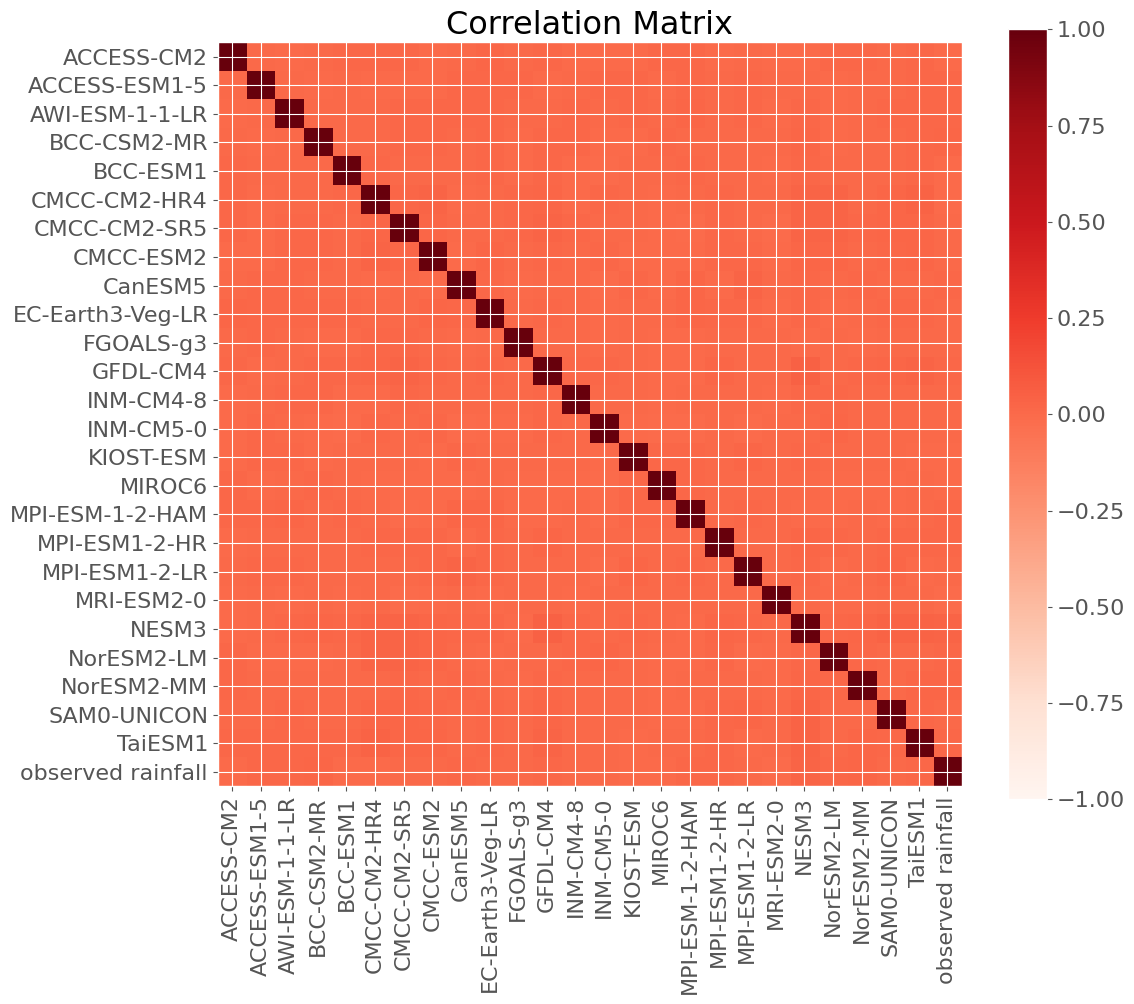

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 10))
correlation_matrix = train.corr()
im = plt.imshow(correlation_matrix, cmap=plt.cm.Reds, vmin=-1, vmax=1)

plt.xticks(np.arange(len(train.columns)), train.columns, rotation=90)
plt.yticks(np.arange(len(train.columns)), train.columns)

plt.colorbar(im)
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Separate features and target
X_train = train.drop('observed rainfall', axis=1)
y_train = train['observed rainfall']
X_test = test.drop('observed rainfall', axis=1)
y_test = test['observed rainfall']

In [13]:
rf = RandomForestRegressor(n_estimators=100, random_state=123)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [14]:
# Make predictions
y_pred = rf.predict(X_test)

In [15]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 8.860047622369347


In [16]:
# Compare the results of the ensemble model with individual climate models:
rmse_individual_models = {}

for model in X_train.columns:
    y_pred_individual = test[model]
    rmse_individual = np.sqrt(mean_squared_error(y_test, y_pred_individual))
    rmse_individual_models[model] = rmse_individual

print("RMSE of individual climate models:")
for model, rmse_value in rmse_individual_models.items():
    print(f"{model}: {rmse_value}")

RMSE of individual climate models:
ACCESS-CM2: 11.038999164831674
ACCESS-ESM1-5: 10.695305344254903
AWI-ESM-1-1-LR: 10.996615631715633
BCC-CSM2-MR: 10.761381427899886
BCC-ESM1: 10.615578137434747
CMCC-CM2-HR4: 10.643203827951398
CMCC-CM2-SR5: 11.480614433817145
CMCC-ESM2: 11.246493197726515
CanESM5: 11.15131777699647
EC-Earth3-Veg-LR: 10.453606330006266
FGOALS-g3: 9.687787799055876
GFDL-CM4: 10.51168216354206
INM-CM4-8: 11.451635243492136
INM-CM5-0: 12.250223033551128
KIOST-ESM: 9.60047959821329
MIROC6: 11.352975753855361
MPI-ESM-1-2-HAM: 10.932004153537616
MPI-ESM1-2-HR: 9.969822737894924
MPI-ESM1-2-LR: 10.260886031395595
MRI-ESM2-0: 9.922794909473932
NESM3: 9.978136637522912
NorESM2-LM: 10.410145004032112
NorESM2-MM: 10.939739964656257
SAM0-UNICON: 11.678749100816889
TaiESM1: 11.528083097152367


## Part 2:

### Preparation for deploying model next week

***NOTE: Complete Question 4 (`Milestone3-task4.ipynb`) from the milestone 3 before coming here***

We’ve found the best hyperparameter settings with MLlib (from the Question 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [ ]:
# Just replace ___ with the numbers you found from Milestone3-task4.ipynb
model = RandomForestRegressor(n_estimators=___, max_depth=___)
model.fit(X_train, y_train)

In [ ]:
print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}")

In [ ]:
# ready to deploy
# where this model is saved? Understand the concept of relative path.
dump(model, "model.joblib")

***Upload model.joblib to s3 under output folder. You choose how you want to upload it (using CLI, SDK, or web console).*** Web console is also completely fine as it is a small file.